# Lab 3
### Averaging Filters

http://scikit-image.org/docs/0.13.x/api/skimage.util.html#skimage.util.random_noise

http://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.median

http://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.gaussian

In [21]:
from commonfunctions import *
import math
from skimage import io
from skimage.color import rgb2gray
from skimage.util import random_noise
from skimage.filters import median
from skimage.filters import gaussian

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
# Load the image
img = io.imread('ex.jpg')
gray_img = rgb2gray(img)
noisy_img = random_noise(gray_img, mode='s&p', amount=0.05)

In [15]:
'''
(1) Your own median filter algorithm
'''
def my_median_filter(in_img, window_width, window_height):
    outputImage = np.copy(in_img)
    
    # Calculate edge margins
    edgex = window_width // 2
    edgey = window_height // 2
    
    # Process each pixel (excluding margins)
    for x in range(edgex, in_img.shape[1] - edgex):     
        for y in range(edgey, in_img.shape[0] - edgey):  

            # storing neighborhood values
            color_array = np.zeros((window_height, window_width))   
            for fx in range(window_width):
                for fy in range(window_height):
                    color_array[fy, fx] = in_img[y + fy - edgey, x + fx - edgex]

            # Flatten the array, sort it, and select the middle value
            flat_array = color_array.flatten()
            sorted_array = np.sort(flat_array)
            median_value = sorted_array[len(sorted_array) // 2]
            outputImage[y, x] = median_value

    return outputImage

In [16]:
'''
(2) skimage median filter
'''
def skimage_median_filter(in_img):
    filtered_img = median(in_img)
    return filtered_img

In [17]:
def compareResults(gray_img, noisy_img, filtered_img):
    fig, ax = plt.subplots(2, 2, figsize=(15, 10))
    ax[0][0].imshow(gray_img, cmap='gray')
    ax[0][0].set_title('Original Image')
    ax[0][1].imshow(noisy_img, cmap='gray')
    ax[0][1].set_title('Noisy Image')
    ax[1][0].imshow(my_median_filter(noisy_img, 3, 3), cmap='gray')
    ax[1][0].set_title('My Median Filter')
    ax[1][1].imshow(filtered_img, cmap='gray')
    ax[1][1].set_title('Skimage Median Filter')

    plt.show()

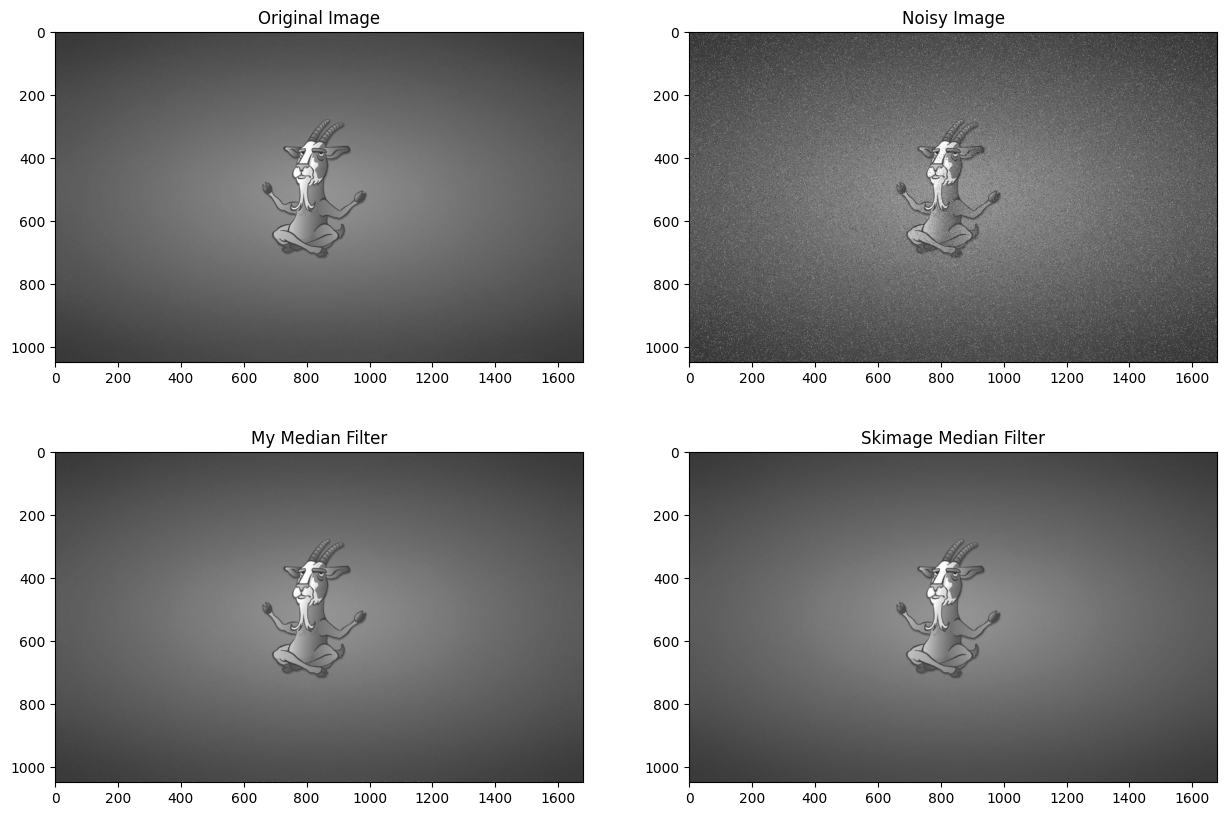

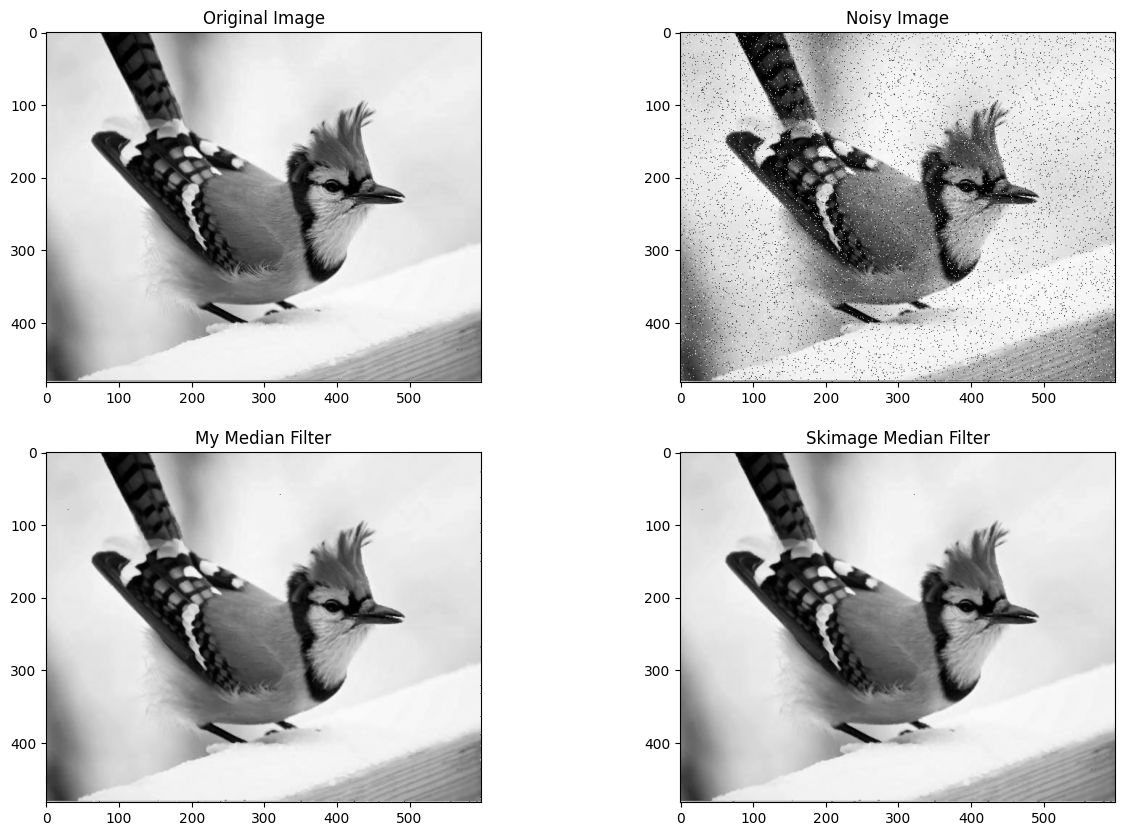

In [23]:
img_paths = ['ex.jpg', 'bird.jpg']

for img_path in img_paths:
    img = io.imread(img_path)
    gray_img = rgb2gray(img)
    noisy_img = random_noise(gray_img, mode='s&p', amount=0.05)
    filtered_img = skimage_median_filter(noisy_img)
    compareResults(gray_img, noisy_img, filtered_img)


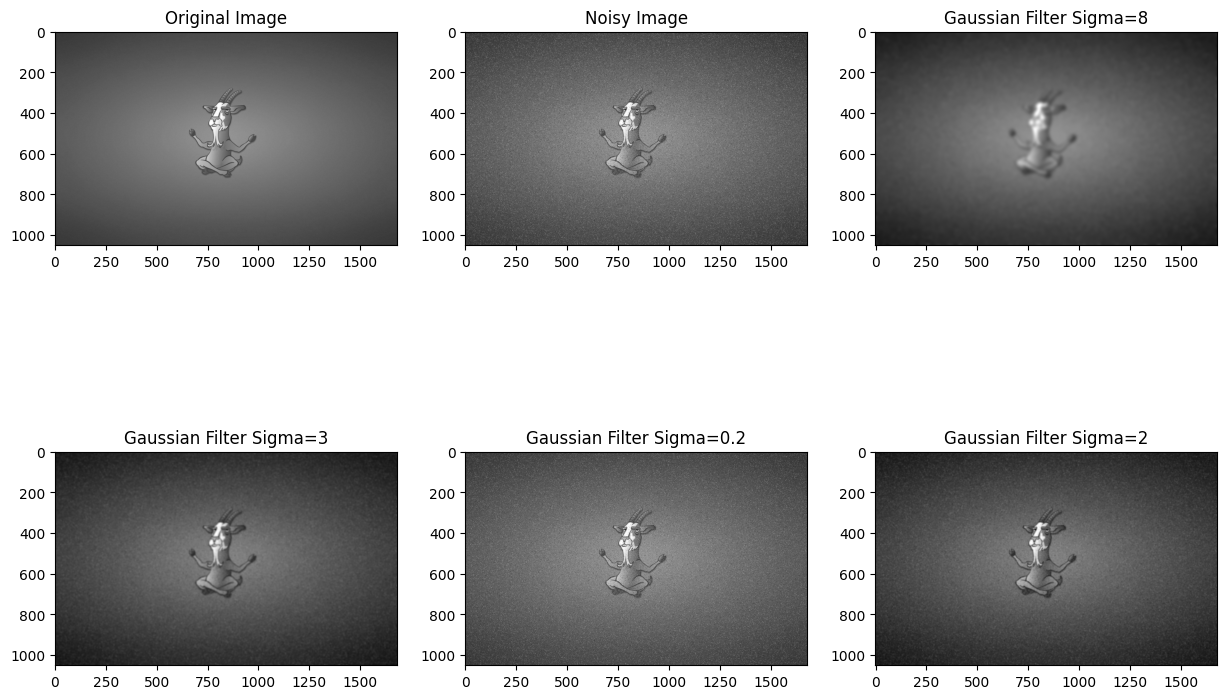

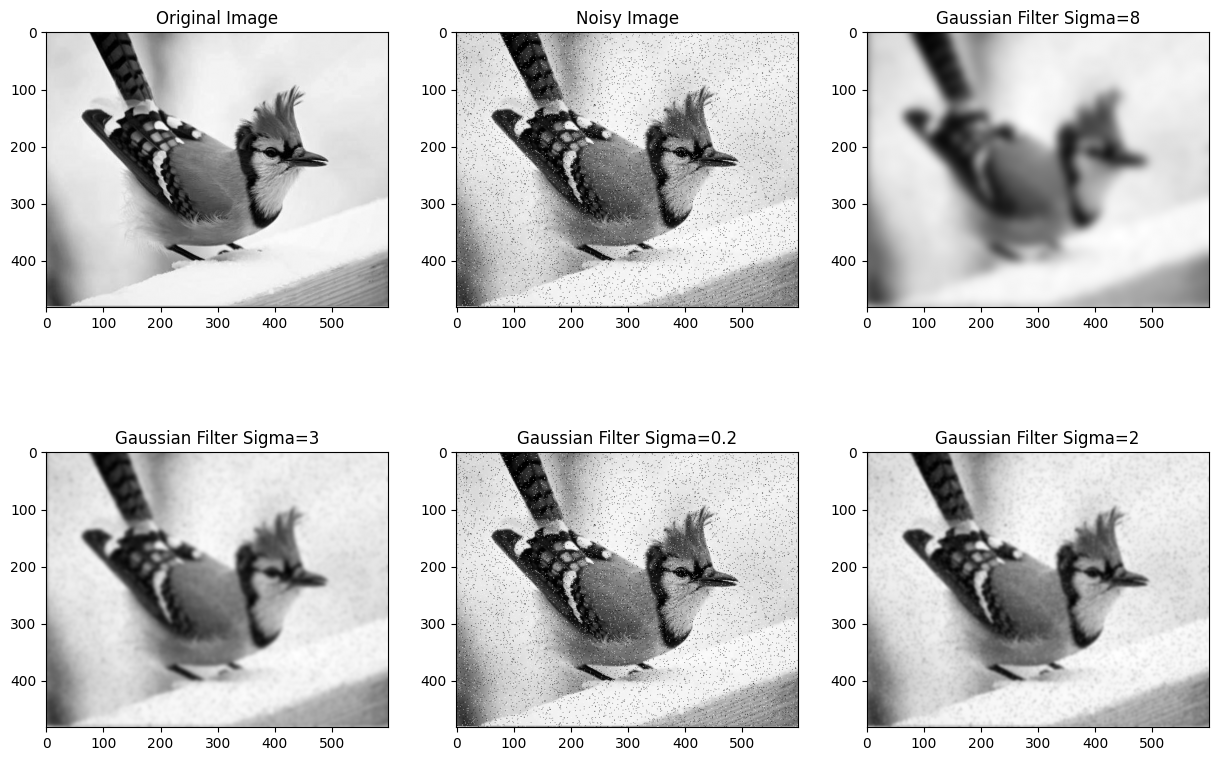

In [28]:
'''
(3) Gaussian Filters
'''
for img_path in img_paths:
    img = io.imread(img_path)
    gray_img = rgb2gray(img)
    noisy_img = random_noise(gray_img, mode='s&p', amount=0.05)
    gaussian_img_8 = gaussian(noisy_img, sigma=8)
    gaussian_img_3 = gaussian(noisy_img, sigma=3)
    gaussian_img_02 = gaussian(noisy_img, sigma=0.2)
    gaussian_img = gaussian(noisy_img, sigma=2)

    fig, ax = plt.subplots(2, 3, figsize=(15, 10))
    ax[0][0].imshow(gray_img, cmap='gray')
    ax[0][0].set_title('Original Image')
    ax[0][1].imshow(noisy_img, cmap='gray')
    ax[0][1].set_title('Noisy Image')
    ax[0][2].imshow(gaussian_img_8, cmap='gray')
    ax[0][2].set_title('Gaussian Filter Sigma=8')
    ax[1][0].imshow(gaussian_img_3, cmap='gray')
    ax[1][0].set_title('Gaussian Filter Sigma=3')
    ax[1][1].imshow(gaussian_img_02, cmap='gray')
    ax[1][1].set_title('Gaussian Filter Sigma=0.2') 
    ax[1][2].imshow(gaussian_img, cmap='gray')
    ax[1][2].set_title('Gaussian Filter Sigma=2')
